In [1]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pymysql as pms
db = pms.connect("140.118.126.136", "123", "1234567890", "test",cursorclass=pms.cursors.DictCursor)
cursor = db.cursor()

cursor.execute("select * from btc_usd order by DATE DESC")
result = cursor.fetchall()
btc_data = pd.DataFrame(result)
btc_data = btc_data.assign(DATE=pd.to_datetime(btc_data['DATE']))
btc_data['VOLUME'] = (pd.to_numeric(btc_data['VOLUME'], errors='coerce').fillna(0))
btc_data['VOLUME'] = btc_data['VOLUME'].astype('int64')
btc_data

,ASK,BID,DATE,HIGH,LAST,LOW,MID,VOLUME
0,6525.200,6525.100,2018-09-15,6572.200,6525.10,6465.000,6525.150,8475
1,6536.000,6535.900,2018-09-14,6596.500,6535.80,6355.200,6535.950,16450
2,6487.900,6487.800,2018-09-13,6528.400,6487.90,6323.100,6487.850,19072
3,6326.200,6326.100,2018-09-12,6355.000,6326.20,6202.800,6326.150,16080
4,6307.000,6306.900,2018-09-11,6399.600,6306.90,6170.000,6306.950,16465
5,6284.100,6284.000,2018-09-10,6373.680,6284.10,6219.000,6284.050,14807
6,6255.800,6255.300,2018-09-09,6458.900,6255.70,6140.500,6255.550,16103
7,6175.900,6175.800,2018-09-08,6475.500,6175.90,6119.500,6175.850,21694
8,6412.600,6412.400,2018-09-07,6549.500,6412.59,6322.800,6412.500,21379
9,6456.600,6456.400,2018-09-06,6932.900,6454.20,6302.200,6456.500,61607


In [2]:
#KD
def getRound(data, decimals = 3):
    return np.around(data, decimals)
def FindTheBuyPoint(a, b, mode):
    if(mode == "rsi_1"):
        buyPoint = np.argwhere(np.diff(np.sign(a - 20)) < 0).reshape(-1) + 0
    else:
        buyPoint = np.argwhere(np.diff(np.sign(a - b)) > 0).reshape(-1) + 0
    return buyPoint

def FindTheSellPoint(a, b, mode):
    if(mode == "rsi_1"):
        sellPoint = np.argwhere(np.diff(np.sign(a - 80)) > 0).reshape(-1) + 0
    else:
        sellPoint = np.argwhere(np.diff(np.sign(a - b)) < 0).reshape(-1) + 0
    return sellPoint
def DeterminedStatus(indicatorResultFast, indicatorResultSlow, result):
    longShortIndex = [i for i in range(len(result)) if result[i] == 1 or result[i] == -1]
    for i in range(len(longShortIndex) - 1):
        begin = longShortIndex[i]
        end = longShortIndex[i + 1]
        # find the series between begin and end
        selectedIndicatorResultFast = indicatorResultFast[begin + 1:end]
        if len(selectedIndicatorResultFast) == 0:
            continue
        selectedIndicatorResultSlow = indicatorResultSlow[begin + 1:end]
        if len(selectedIndicatorResultSlow) == 0:
            continue
        # find the distance of every elements
        distanceSeries = [abs(x1 - x2) for (x1, x2) in zip(selectedIndicatorResultFast, selectedIndicatorResultSlow)]
        
        # normalize all distance to [0, 1]
        maxDistance = max(distanceSeries)
        distanceSeries = [i * 2 / maxDistance for i in distanceSeries]
        
        # find the index of largest distance
        largestIndex = begin + 1 + distanceSeries.index(2)
        result[largestIndex] = 0
        firstNumber, lastNumber = result[begin], result[end]
        for j in range(begin + 1, end):
            if j != largestIndex:
                if firstNumber == 1:
                    result[j] = firstNumber - distanceSeries[j - (begin + 1)]
                else:
                    result[j] = firstNumber + distanceSeries[j - (begin + 1)]
    # TO deal w/ the records which are not between long point and short point
    begin = longShortIndex[-1]
    end = len(indicatorResultFast)
    targetListF = indicatorResultFast[begin + 1:end]
    targetListS = indicatorResultSlow[begin + 1:end]
    # find the distance of every elements
    distanceSeries = [abs(x1 - x2) for (x1, x2) in zip(targetListF, targetListS)]
    # normalize all distance to [0, 1]
    maxDistance = max(distanceSeries)
    distanceSeries = [i * 2 / maxDistance for i in distanceSeries]
    # find the index of largest distance
    largestIndex = begin + 1 + distanceSeries.index(2)
    result[largestIndex] = 0
    firstNumber, lastNumber = result[begin], result[end - 1]
    for i in range(begin + 1, end):
        if i != largestIndex:
            if firstNumber == 1:
                result[i] = firstNumber - distanceSeries[i - (begin + 1)]
            else:
                result[i] = firstNumber + distanceSeries[i - (begin + 1)]
    return result
def KD(data, result = {}):
    close = data['LAST'].copy()
    for i in range(0,9):
        close[i] = 0

    data['RSV'] = (( data['LAST'] - data['LOW'].rolling(window = 9).min()) / (data['HIGH'].rolling(window = 9).max() - data['LOW'].rolling(window = 9).min()))
    data['RSV'] = data['RSV'].fillna(0)
    if(not result):
        result = {
            'K9':[0],
            'D9' :[0]
        }
    data=data.reset_index(drop=True)
    #calculate everyday's KD
    for i in range(1, len(data.index)):
        K9_value = (1.0/3.0) * data['RSV'][i] + (2.0 / 3.0) * result['K9'][i - 1]
        result['K9'].append(getRound(K9_value, 5))
        D9_value = (2.0/3.0) * result['D9'][i - 1] + (1.0 / 3.0) * result['K9'][i]
        result['D9'].append(getRound(D9_value, 5))
        
    return result

def SMA(data, period):
    if (type(data) == pd.core.series.Series):
        return data.rolling(window = period).mean()
    else:
        print ("Error: Wrong input, SMA(pandas.core.series.Series, integer)")

def RSI(data, period):
    if (type(data) == pd.core.series.Series):
        delta = data.diff()
        up, down = delta.copy(), delta.copy()

        up[up < 0] = 0
        down[down > 0] = 0
        down = abs(down)
        
        Up = SMA(up, period)
        Up = Up.fillna(0)
        for i in range(period,len(Up)):
            Up[i] = getRound((Up[i - 1] * (period - 1) + up[i]) / period)

        Down = SMA(down, period)
        Down = Down.fillna(0)
        for i in range(period,len(Down)):
            Down[i] = getRound((Down[i - 1] * (period - 1) + down[i]) / period)


        rsi = 100 * (Up / (Up + Down))
        rsi = rsi.fillna(0)
        return getRound(rsi, 2)
    else:
        print ("Error: Wrong input, RSI(pandas.core.series.Series, integer)")        

def add_KD(model_data):
    KD_result = pd.DataFrame(KD(model_data))

    # kd's long points & short points
    KD_long = FindTheBuyPoint(KD_result['K9'], KD_result['D9'], "kd")
    KD_short = FindTheSellPoint(KD_result['K9'], KD_result['D9'], "kd")

    # create a long/short points list
    KD_result = [[0] for i in range(len(KD_result))]

    for i in KD_long:
        KD_result[i][0] = 1
    for i in KD_short:
        KD_result[i][0] = -1
    
    KD_result=np.array(KD_result).reshape(len(model_data.index)).tolist()
    model_data["KD"]=KD_result
    model_data=model_data.drop("RSV",1)
    return model_data

def add_RSI(model_data):
# rsi
    rsi5_result = pd.DataFrame(RSI(model_data['LAST'], 5))
    rsi5_result = rsi5_result.rename(columns={'LAST': 'rsi'})

    rsi14_result = pd.DataFrame(RSI(model_data['LAST'], 14))
    rsi14_result = rsi14_result.rename(columns={'LAST': 'rsi'})

# rsi's long points & short points
    rsi_long_with1curve = FindTheBuyPoint(rsi14_result['rsi'], [], "rsi_1")
    rsi_short_with1curve = FindTheSellPoint(rsi14_result['rsi'], [], "rsi_1")

    rsi_long_with2curve = FindTheBuyPoint(rsi5_result['rsi'], rsi14_result['rsi'], "rsi_2")
    rsi_short_with2curve = FindTheSellPoint(rsi5_result['rsi'], rsi14_result['rsi'], "rsi_2")

# create a long/short points list
    rsi1curve_result = [[0] for i in range(len(rsi14_result))]
    rsi2curve_result = [[0] for i in range(len(rsi14_result))]

    for i in rsi_long_with1curve:
        rsi1curve_result[i][0] = 1
    for i in rsi_short_with1curve:
        rsi1curve_result[i][0] = -1
    for i in rsi_long_with2curve:
        rsi2curve_result[i][0] = 1
    for i in rsi_short_with2curve:
        rsi2curve_result[i][0] = -1
    
    rsi_result=np.array(rsi1curve_result).reshape(len(model_data.index)).tolist()
    model_data["RSI1"]=rsi_result
    rsi_result=np.array(rsi2curve_result).reshape(len(model_data.index)).tolist()
    model_data["RSI2"]=rsi_result
    return model_data

def add_SMA(model_data):
    # sma
    sma_result_5 = pd.DataFrame(SMA(model_data['LAST'], 5))
    sma_result_10 = pd.DataFrame(SMA(model_data['LAST'], 10))
    sma_result_5 = sma_result_5.rename(columns={'LAST':'sma5'})
    sma_result_10 = sma_result_10.rename(columns={'LAST':'sma10'})

    sma_result_20 = pd.DataFrame(SMA(model_data['LAST'], 20))
    sma_result_60 = pd.DataFrame(SMA(model_data['LAST'], 60))
    sma_result_20 = sma_result_20.rename(columns={'LAST':'sma20'})
    sma_result_60 = sma_result_60.rename(columns={'LAST':'sma60'})

    sma_result_120 = pd.DataFrame(SMA(model_data['LAST'], 120))
    sma_result_240 = pd.DataFrame(SMA(model_data['LAST'], 240))
    sma_result_120 = sma_result_120.rename(columns={'LAST':'sma120'})
    sma_result_240 = sma_result_240.rename(columns={'LAST':'sma240'})

    sma_result_5.fillna(value=0, inplace=True)
    sma_result_10.fillna(value=0, inplace=True)
    sma_result_20.fillna(value=0, inplace=True)
    sma_result_60.fillna(value=0, inplace=True)
    sma_result_120.fillna(value=0, inplace=True)
    sma_result_240.fillna(value=0, inplace=True)

    # sma's long points & short points
    smas_long = FindTheBuyPoint(sma_result_5['sma5'], sma_result_10['sma10'], "sma")
    smas_short = FindTheSellPoint(sma_result_5['sma5'], sma_result_10['sma10'], "sma")

    smam_long = FindTheBuyPoint(sma_result_20['sma20'], sma_result_60['sma60'], "sma")
    smam_short = FindTheSellPoint(sma_result_20['sma20'], sma_result_60['sma60'], "sma")

    smal_long = FindTheBuyPoint(sma_result_120['sma120'], sma_result_240['sma240'], "sma")
    smal_short = FindTheSellPoint(sma_result_120['sma120'], sma_result_240['sma240'], "sma")

    # create a long/short points list
    smas_result = [[0] for i in range(len(sma_result_5))]
    smam_result = [[0] for i in range(len(sma_result_5))]
    smal_result = [[0] for i in range(len(sma_result_5))]

    for i in smas_long:
        smas_result[i][0] = 1
    for i in smas_short:
        smas_result[i][0] = -1
    for i in smam_long:
        smam_result[i][0] = 1
    for i in smam_short:
        smam_result[i][0] = -1
    for i in smal_long:
        smal_result[i][0] = 1
    for i in smal_short:
        smal_result[i][0] = -1
    
    smal_result=np.array(smal_result).reshape(len(model_data.index)).tolist()
    smam_result=np.array(smam_result).reshape(len(model_data.index)).tolist()
    smas_result=np.array(smas_result).reshape(len(model_data.index)).tolist()
    model_data["SMA_L"]=smal_result
    model_data["SMA_M"]=smam_result
    model_data["SMA_S"]=smas_result
    return model_data

In [3]:
def MACD(data, period):
    if (type(data) == pd.core.frame.DataFrame and len(period) == 3):   
        di = (data['HIGH'] + data['LOW'] + 2.0 * data['LAST']) / 4.0
        ema12 = SMA(di, period[0])
        ema12 = ema12.fillna(0)
        for i in range(period[0] + 1, len(ema12)):
            ema12[i] = (ema12[i - 1] * (period[0] - 1) + di[i] * 2.0) / (period[0] + 1)
    
        ema26 = SMA(di, period[1])
        ema26 = ema26.fillna(0)
        for i in range(period[1] + 1, len(ema26)):
            ema26[i] = (ema26[i - 1] * (period[1] - 1) + di[i] * 2.0) / (period[1] + 1)
    
        dif = ema12 - ema26

        dem = SMA(dif, period[2])
        dem = dem.fillna(0)
        for i in range(period[2] + 1, len(dem)):
            dem[i] = (dem[i - 1] * (period[2] - 1) + dif[i] * 2.0) / (period[2] + 1)
        return {'dif':dif, 'dem':dem}
    else:
        if(type(data) == pd.core.frame.DataFrame):
            print ("Error: Wrong input, MACD(pandas.core.frame.DataFrame, list of integer)")
        elif(len(period) == 3):
            print ("Error: number of content in list do not equal to 3")
def add_KD_new(model_data):
    KD_val = pd.DataFrame(KD(model_data))

    # kd's long points & short points
    KD_long = FindTheBuyPoint(KD_val['K9'], KD_val['D9'], "kd")
    KD_short = FindTheSellPoint(KD_val['K9'], KD_val['D9'], "kd")

    # create a long/short points list
    KD_result = [0 for i in range(len(KD_val))]

    for i in KD_long:
        KD_result[i] = 1
    for i in KD_short:
        KD_result[i] = -1
   
    KD_result = DeterminedStatus(list(KD_val['K9']), list(KD_val['D9']), KD_result)
    KD_result = pd.Series(KD_result).fillna(0).tolist()
    model_data["KD_new"]=KD_result
    model_data=model_data.drop("RSV",1)
    return model_data

def add_RSI_new(model_data):
# rsi
    rsi5_result = pd.DataFrame(RSI(model_data['LAST'], 5))
    rsi5_result = rsi5_result.rename(columns={'LAST': 'rsi'})

    rsi14_result = pd.DataFrame(RSI(model_data['LAST'], 14))
    rsi14_result = rsi14_result.rename(columns={'LAST': 'rsi'})

# rsi's long points & short points
    rsi_long_with1curve = FindTheBuyPoint(rsi14_result['rsi'], [], "rsi_1")
    rsi_short_with1curve = FindTheSellPoint(rsi14_result['rsi'], [], "rsi_1")

    rsi_long_with2curve = FindTheBuyPoint(rsi5_result['rsi'], rsi14_result['rsi'], "rsi_2")
    rsi_short_with2curve = FindTheSellPoint(rsi5_result['rsi'], rsi14_result['rsi'], "rsi_2")

# create a long/short points list
    rsi1curve_result = [0 for i in range(len(rsi14_result))]
    rsi2curve_result = [0 for i in range(len(rsi14_result))]
    for i in rsi_long_with1curve:
        rsi1curve_result[i] = 1
    for i in rsi_short_with1curve:
        rsi1curve_result[i] = -1
    for i in range(len(rsi1curve_result)):
        if rsi1curve_result[i] == 0:
            if rsi14_result['rsi'][i] >= 20 and rsi14_result['rsi'][i] <= 80:
                rsi1curve_result[i] = (-1.0 + 2.0 * (rsi14_result['rsi'][i] - 20.0) / (80.0 - 20.0)) / 2.0
            elif rsi14_result['rsi'][i] < 20:
                rsi1curve_result[i] = (1 + abs((rsi14_result['rsi'][i] - 20.0) / 20)) / 2.0
            elif rsi14_result['rsi'][i] > 80:
                rsi1curve_result[i] = (-1 - abs((rsi14_result['rsi'][i] - 80.0) / 80.0)) / 2.0
    rsi1curve_result = pd.Series(rsi1curve_result).fillna(0).tolist()

    for i in rsi_long_with2curve:
        rsi2curve_result[i] = 1
    for i in rsi_short_with2curve:
        rsi2curve_result[i] = -1
    rsi2curve_result = DeterminedStatus(list(rsi5_result['rsi']), list(rsi14_result['rsi']), rsi2curve_result)
    rsi2curve_result = pd.Series(rsi2curve_result).fillna(0).tolist()
    model_data["RSI1_new"]=rsi1curve_result
    model_data["RSI2_new"]=rsi2curve_result
    return model_data

def add_SMA_new(model_data):
    # sma
    sma_result_5 = pd.DataFrame(SMA(model_data['LAST'], 5))
    sma_result_10 = pd.DataFrame(SMA(model_data['LAST'], 10))
    sma_result_5 = sma_result_5.rename(columns={'LAST':'sma5'})
    sma_result_10 = sma_result_10.rename(columns={'LAST':'sma10'})

    sma_result_20 = pd.DataFrame(SMA(model_data['LAST'], 20))
    sma_result_60 = pd.DataFrame(SMA(model_data['LAST'], 60))
    sma_result_20 = sma_result_20.rename(columns={'LAST':'sma20'})
    sma_result_60 = sma_result_60.rename(columns={'LAST':'sma60'})

    sma_result_120 = pd.DataFrame(SMA(model_data['LAST'], 120))
    sma_result_240 = pd.DataFrame(SMA(model_data['LAST'], 240))
    sma_result_120 = sma_result_120.rename(columns={'LAST':'sma120'})
    sma_result_240 = sma_result_240.rename(columns={'LAST':'sma240'})

    sma_result_5.fillna(value=0, inplace=True)
    sma_result_10.fillna(value=0, inplace=True)
    sma_result_20.fillna(value=0, inplace=True)
    sma_result_60.fillna(value=0, inplace=True)
    sma_result_120.fillna(value=0, inplace=True)
    sma_result_240.fillna(value=0, inplace=True)

    # sma's long points & short points
    smas_long = FindTheBuyPoint(sma_result_5['sma5'], sma_result_10['sma10'], "sma")
    smas_short = FindTheSellPoint(sma_result_5['sma5'], sma_result_10['sma10'], "sma")

    smam_long = FindTheBuyPoint(sma_result_20['sma20'], sma_result_60['sma60'], "sma")
    smam_short = FindTheSellPoint(sma_result_20['sma20'], sma_result_60['sma60'], "sma")

    smal_long = FindTheBuyPoint(sma_result_120['sma120'], sma_result_240['sma240'], "sma")
    smal_short = FindTheSellPoint(sma_result_120['sma120'], sma_result_240['sma240'], "sma")

    # create a long/short points list
    smas_result = [0 for i in range(len(sma_result_5))]
    smam_result = [0 for i in range(len(sma_result_5))]
    smal_result = [0 for i in range(len(sma_result_5))]

    for i in smas_long:
        smas_result[i] = 1
    for i in smas_short:
        smas_result[i] = -1
    smas_result = DeterminedStatus(list(sma_result_5['sma5']), list(sma_result_10['sma10']), smas_result)
    smas_result = pd.Series(smas_result).fillna(0).tolist()
    
    for i in smam_long:
        smam_result[i] = 1
    for i in smam_short:
        smam_result[i] = -1
    smam_result = DeterminedStatus(list(sma_result_20['sma20']), list(sma_result_60['sma60']), smam_result)
    smam_result = pd.Series(smam_result).fillna(0).tolist()
    
    for i in smal_long:
        smal_result[i] = 1
    for i in smal_short:
        smal_result[i] = -1
    smal_result = DeterminedStatus(list(sma_result_120['sma120']), list(sma_result_240['sma240']), smal_result)
    smal_result = pd.Series(smal_result).fillna(0).tolist()
    model_data["SMA_L_new"]=smal_result
    model_data["SMA_M_new"]=smam_result
    model_data["SMA_S_new"]=smas_result
    return model_data
def add_MACD_new(model_data):
    MACD_val = pd.DataFrame(MACD(model_data, [12,26,9]))
    MACD_long = FindTheBuyPoint(MACD_val['dif'], MACD_val['dem'], "macd")
    MACD_short = FindTheSellPoint(MACD_val['dif'], MACD_val['dem'], "macd")
    
    MACD_result = [0 for i in range(len(MACD_val))]

    for i in MACD_long:
        MACD_result[i] = 1
    for i in MACD_short:
        MACD_result[i] = -1

    MACD_result = DeterminedStatus(list(MACD_val['dif']), list(MACD_val['dem']), MACD_result)
    MACD_result = pd.Series(MACD_result).fillna(0).tolist()
    model_data["MACD_new"] = MACD_result
    return model_data

In [4]:
#def some fun tp process data
def add_newcol(btc_data): #新增closeoffhigh和volatolity欄位，增加模型訓練的準確度
    market_info = btc_data[btc_data['DATE']>='2017-01-01'] #將資料只獲取從2017-01-01之後的內容，存到 market_info
    kwargs = { 'CLOSE_OFF_HIGH': lambda x: 2*(x['HIGH'] - x['LAST']) / (x['HIGH'] - x['LOW']) - 1,
          'VOLATILITY': lambda x: (x['HIGH'] - x['LOW']) / (x['MID'])} 
    market_info = market_info.assign(**kwargs)
    return market_info
def create_model_data(btc_data):#選取待會訓練模型所需要的資料
    model_data = btc_data[["DATE"]+["LAST"]+["VOLUME"]+["CLOSE_OFF_HIGH"]+["VOLATILITY"]+["HIGH"]+["LOW"]]
    model_data = model_data.sort_values(by='DATE')
    return model_data
def create_input_data(data,window_len,norm_cols):#決定訓練時以多少天的大小作訓練(window_len)，以每個為window_len大小的array，作為待會訓練模型的input
    inputs = [] #將Close,Volume以每筆的第一個資料來作正規化，讓值介於-1,1之間
    for i in range(len(data)-window_len+1):
        temp_set = data[i:(i+window_len)].copy()
        for col in norm_cols:
            temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] - 1 
        inputs.append(temp_set)
    return inputs
def create_training_input_data(data,window_len,norm_cols):
    inputs = [] #將Close,Volume以每筆的第一個資料來作正規化，讓值介於-1,1之間
    for i in range(len(data)-window_len):
        temp_set = data[i:(i+window_len)].copy()
        for col in norm_cols:
            temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] - 1 
        inputs.append(temp_set)
    return inputs
def create_output_data(data,window_len):#模型的輸出
    return (data['LAST'][window_len:].values / data['LAST'][:-window_len].values) - 1
def data_to_np(data):#原本資料的型態為dataframe，這裡將型態轉為numpy array，模型的資料是以這種型態為主
    data = [np.array(datas)for datas in data]
    data = np.array(data)
    return data

In [5]:
market_info = add_newcol(btc_data)
market_info.head()

,ASK,BID,DATE,HIGH,LAST,LOW,MID,VOLUME,CLOSE_OFF_HIGH,VOLATILITY
0,6525.2,6525.1,2018-09-15,6572.2,6525.1,6465.0,6525.15,8475,-0.121269,0.016429
1,6536.0,6535.9,2018-09-14,6596.5,6535.8,6355.2,6535.95,16450,-0.496892,0.036919
2,6487.9,6487.8,2018-09-13,6528.4,6487.9,6323.1,6487.85,19072,-0.605455,0.031644
3,6326.2,6326.1,2018-09-12,6355.0,6326.2,6202.8,6326.15,16080,-0.621551,0.024059
4,6307.0,6306.9,2018-09-11,6399.6,6306.9,6170.0,6306.95,16465,-0.192509,0.036404


In [6]:
model_data = create_model_data(market_info)
model_data=add_KD(model_data)
model_data=add_RSI(model_data)
model_data=add_SMA(model_data)
model_data=add_KD_new(model_data)
model_data=add_RSI_new(model_data)
model_data=add_SMA_new(model_data)
model_data=add_MACD_new(model_data)

In [101]:
#final_data = model_data[["DATE"]+["LAST"]+["VOLUME"]+["KD"]+["RSI1"]+["RSI2"]+["SMA_M"]+["KD_new"]+["RSI1_new"]+["RSI2_new"]+["SMA_M_new"]+["MACD_new"]+['VOLATILITY']+['CLOSE_OFF_HIGH']]
final_data = model_data[["DATE"]+["LAST"]+["VOLUME"]+["KD"]+["RSI1"]+["RSI2"]+["SMA_M"]+["KD_new"]+["RSI1_new"]+["RSI2_new"]+["SMA_M_new"]+["MACD_new"]+['VOLATILITY']+['CLOSE_OFF_HIGH']]

In [102]:
split_date  = '2018-01-01' #將training_set,test_set從這個日期做劃分
training_set, test_set = final_data[final_data['DATE']<split_date], final_data[final_data['DATE']>=split_date]
test_set.tail()

,DATE,LAST,VOLUME,MACD_new,VOLATILITY,CLOSE_OFF_HIGH
4,2018-09-11,6306.9,16465,0.411903,0.036404,-0.192509
3,2018-09-12,6326.2,16080,0.580804,0.024059,-0.621551
2,2018-09-13,6487.9,19072,0.738935,0.031644,-0.605455
1,2018-09-14,6535.8,16450,0.875458,0.036919,-0.496892
0,2018-09-15,6525.1,8475,0.000000,0.016429,-0.121269


In [103]:
training_set = training_set.drop('DATE', 1) #將Date的欄位刪掉，因為之後不會需要用到它，因為後面要將形式轉為np array，故只留數值的部分
test_set = test_set.drop('DATE', 1)

In [104]:
window_len = 3 #決定模型要獲取幾天前的數據，隨意選擇
norm_cols = ['LAST','VOLUME']
LSTM_training_inputs = create_training_input_data(training_set,window_len,norm_cols)
LSTM_test_inputs = create_input_data(test_set,window_len,norm_cols)
LSTM_training_outputs = create_output_data(training_set,window_len)

In [105]:
#以 np array的形式做處理，當存以數字的形式
LSTM_training_inputs = data_to_np(LSTM_training_inputs)
LSTM_test_inputs = data_to_np(LSTM_test_inputs)
LSTM_training_outputs = data_to_np(LSTM_training_outputs)

In [106]:
import os
import random as rn
import tensorflow as tf
os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(201)
rn.seed(201)
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1,inter_op_parallelism_threads=1)
sess = tf.Session(config=tf.ConfigProto(inter_op_parallelism_threads=1))
from keras import backend as K
tf.set_random_seed(202)

K.set_session(sess)

In [107]:

# import the relevant Keras modules# import 

#開始建造LSTM模型
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import LeakyReLU

#neurons=神經元個數(可自訂),epochs=訓練的次數,lose.optimizer都可更改(但結果以這兩個最好)
def build_model1(inputs, output_size, neurons, activ_func="linear",
                dropout=0.25, loss="mse", optimizer="adam"):
    model = Sequential()
    
    model.add(LSTM(neurons, input_shape=(inputs.shape[1], inputs.shape[2])))
    model.add(Dropout(dropout))
    
    #outputlayer
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))
    #model.add(LeakyReLU())

    model.compile(loss=loss, optimizer=optimizer)
    return model

In [108]:
# random seed for reproducibility# random 
np.random.seed(202)
# initialise model architecture
bt_model = build_model1(LSTM_training_inputs, output_size=1, neurons = 256)
bt_history = bt_model.fit(LSTM_training_inputs, 
                            LSTM_training_outputs, 
                            epochs=100, batch_size=1, verbose=2, shuffle=True)

Epoch 1/100
 - 35s - loss: 0.0058
Epoch 2/100
 - 17s - loss: 0.0038
Epoch 3/100
 - 14s - loss: 0.0035
Epoch 4/100
 - 14s - loss: 0.0036
Epoch 5/100
 - 15s - loss: 0.0033
Epoch 6/100
 - 15s - loss: 0.0035
Epoch 7/100
 - 14s - loss: 0.0031
Epoch 8/100
 - 14s - loss: 0.0032
Epoch 9/100
 - 14s - loss: 0.0032
Epoch 10/100
 - 15s - loss: 0.0030
Epoch 11/100
 - 16s - loss: 0.0030
Epoch 12/100
 - 17s - loss: 0.0028
Epoch 13/100
 - 15s - loss: 0.0033
Epoch 14/100
 - 13s - loss: 0.0029
Epoch 15/100
 - 12s - loss: 0.0027
Epoch 16/100
 - 14s - loss: 0.0030
Epoch 17/100
 - 13s - loss: 0.0028
Epoch 18/100
 - 13s - loss: 0.0028
Epoch 19/100
 - 12s - loss: 0.0028
Epoch 20/100
 - 13s - loss: 0.0030
Epoch 21/100
 - 12s - loss: 0.0028
Epoch 22/100
 - 13s - loss: 0.0028
Epoch 23/100
 - 13s - loss: 0.0029
Epoch 24/100
 - 13s - loss: 0.0027
Epoch 25/100
 - 12s - loss: 0.0027
Epoch 26/100
 - 13s - loss: 0.0026
Epoch 27/100
 - 13s - loss: 0.0028
Epoch 28/100
 - 12s - loss: 0.0025
Epoch 29/100
 - 12s - loss: 0

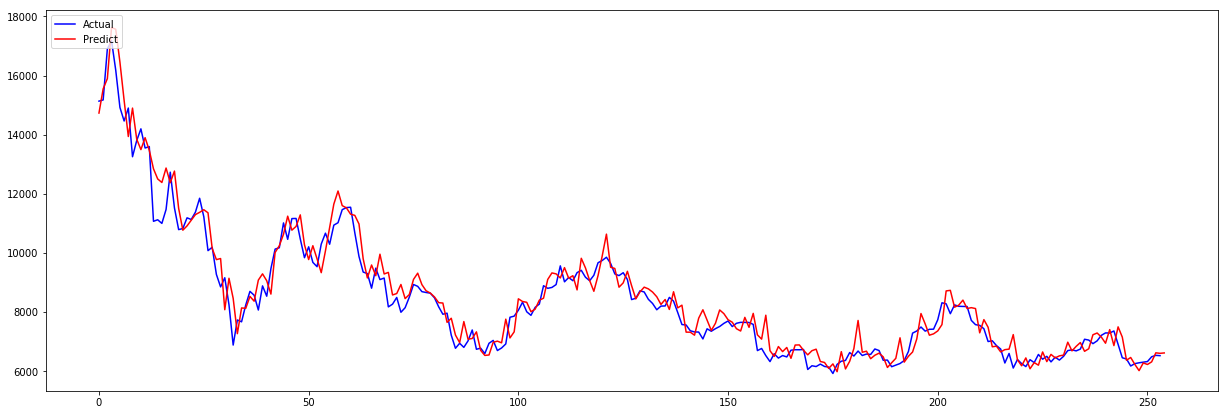

In [109]:
plt.figure(figsize=(21,7))
plt.plot(test_set['LAST'][window_len:].reset_index(drop=True), label='Actual',color='blue')
plt.plot(((np.transpose(bt_model.predict(LSTM_test_inputs))+1) * test_set['LAST'].values[:-window_len+1])[0],label='Predict',color='red')
plt.legend(loc='upper left')
plt.show()

In [110]:
print(((np.transpose(bt_model.predict(LSTM_test_inputs[-1:]))+1) * test_set['LAST'].values[-window_len:-window_len+1])[0])

[6617.40883567]


In [111]:
# random seed for reproducibility# random 
np.random.seed(202)
# initialise model architecture
bt_model = build_model1(LSTM_training_inputs, output_size=1, neurons = 256)
bt_history = bt_model.fit(LSTM_training_inputs, 
                            LSTM_training_outputs, 
                            epochs=100, batch_size=1, verbose=2, shuffle=False)

Epoch 1/100
 - 19s - loss: 0.0059
Epoch 2/100
 - 13s - loss: 0.0048
Epoch 3/100
 - 13s - loss: 0.0039
Epoch 4/100
 - 13s - loss: 0.0034
Epoch 5/100
 - 13s - loss: 0.0034
Epoch 6/100
 - 11s - loss: 0.0033
Epoch 7/100
 - 11s - loss: 0.0032
Epoch 8/100
 - 13s - loss: 0.0030
Epoch 9/100
 - 12s - loss: 0.0032
Epoch 10/100
 - 13s - loss: 0.0030
Epoch 11/100
 - 13s - loss: 0.0029
Epoch 12/100
 - 13s - loss: 0.0030
Epoch 13/100
 - 13s - loss: 0.0030
Epoch 14/100
 - 13s - loss: 0.0029
Epoch 15/100
 - 14s - loss: 0.0028
Epoch 16/100
 - 13s - loss: 0.0028
Epoch 17/100
 - 12s - loss: 0.0028
Epoch 18/100
 - 13s - loss: 0.0029
Epoch 19/100
 - 13s - loss: 0.0028
Epoch 20/100
 - 12s - loss: 0.0028
Epoch 21/100
 - 13s - loss: 0.0025
Epoch 22/100
 - 13s - loss: 0.0028
Epoch 23/100
 - 13s - loss: 0.0028
Epoch 24/100
 - 13s - loss: 0.0028
Epoch 25/100
 - 13s - loss: 0.0027
Epoch 26/100
 - 13s - loss: 0.0028
Epoch 27/100
 - 13s - loss: 0.0026
Epoch 28/100
 - 13s - loss: 0.0026
Epoch 29/100
 - 13s - loss: 0

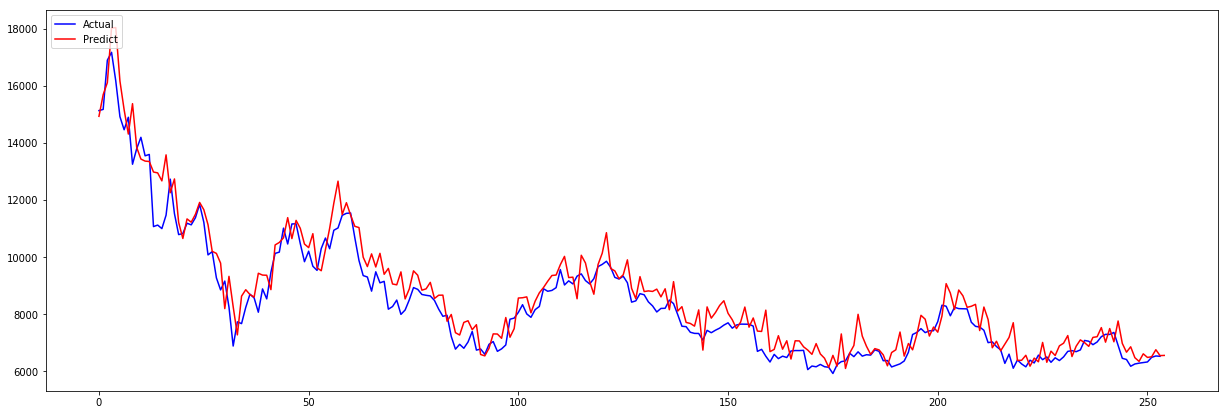

In [112]:
plt.figure(figsize=(21,7))
plt.plot(test_set['LAST'][window_len:].reset_index(drop=True), label='Actual',color='blue')
plt.plot(((np.transpose(bt_model.predict(LSTM_test_inputs))+1) * test_set['LAST'].values[:-window_len+1])[0],label='Predict',color='red')
plt.legend(loc='upper left')
plt.show()

In [113]:
print(((np.transpose(bt_model.predict(LSTM_test_inputs[-1:]))+1) * test_set['LAST'].values[-window_len:-window_len+1])[0])

[6555.4147465]
